In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

In [129]:
df = pd.read_csv('data.csv')

In [130]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [131]:
na_ratio_cols = df.isna().mean(axis=0)
na_ratio_cols

Bankrupt?                                                   0.0
 ROA(C) before interest and depreciation before interest    0.0
 ROA(A) before interest and % after tax                     0.0
 ROA(B) before interest and depreciation after tax          0.0
 Operating Gross Margin                                     0.0
                                                           ... 
 Liability to Equity                                        0.0
 Degree of Financial Leverage (DFL)                         0.0
 Interest Coverage Ratio (Interest expense to EBIT)         0.0
 Net Income Flag                                            0.0
 Equity to Liability                                        0.0
Length: 96, dtype: float64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [133]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [134]:
df.shape

(6819, 96)

In [161]:
(df[df.columns] == 0).sum(axis = 0)

Bankrupt?                                                   6599
 ROA(C) before interest and depreciation before interest       1
 ROA(A) before interest and % after tax                        1
 ROA(B) before interest and depreciation after tax             1
 Operating Gross Margin                                        1
                                                            ... 
 Liability to Equity                                           1
 Degree of Financial Leverage (DFL)                            1
 Interest Coverage Ratio (Interest expense to EBIT)            1
 Net Income Flag                                               0
 Equity to Liability                                           1
Length: 96, dtype: int64

In [218]:
df[' Continuous interest rate (after tax)']  

0       0.780985
1       0.781506
2       0.780284
3       0.781241
4       0.781550
          ...   
6814    0.781588
6815    0.781586
6816    0.781546
6817    0.781663
6818    0.786079
Name:  Continuous interest rate (after tax), Length: 6819, dtype: float64

In [216]:
df.loc[:, (df==0).mean() > .7]

,Bankrupt?,Liability-Assets Flag
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6814,0,0
6815,0,0
6816,0,0
6817,0,0


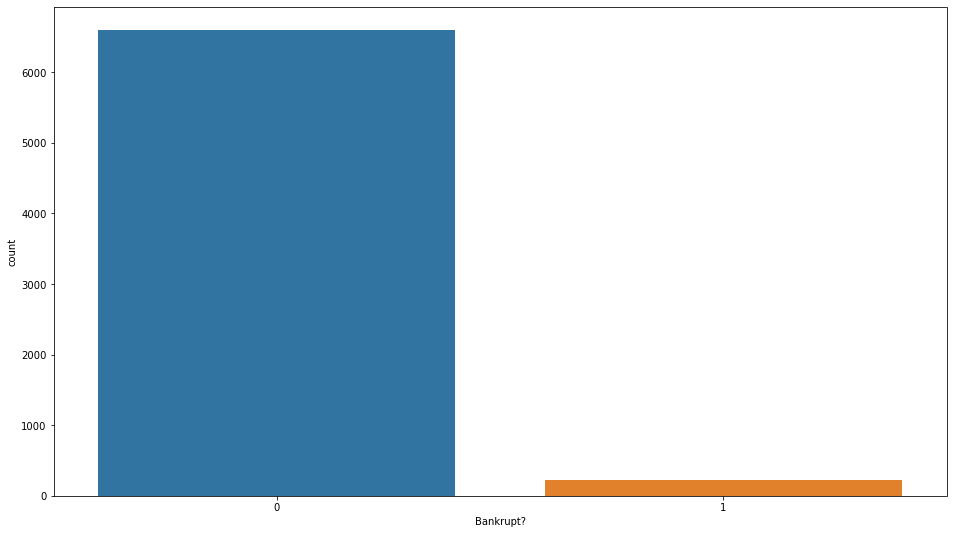

In [135]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt?',data = df)
plt.show()

In [136]:
y = np.array(df['Bankrupt?'])
X = df.drop(['Bankrupt?'], axis=1)

In [137]:
X

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Splitting data to datasets for training, validation and testing

In [138]:
def split_data(X,y):
    
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, stratify=y, test_size=0.3, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
    )
    return X_train, X_val, X_test, y_train, y_val, y_test 

In [139]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X,y)

In [140]:
print('X_train:', X_train.shape)
print('y_train:', X_train.shape)
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('y_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4773, 95)
y_train: (4773, 95)
X_val: (1432, 95)
y_val: (1432,)
y_test: (614, 95)
y_test: (614,)


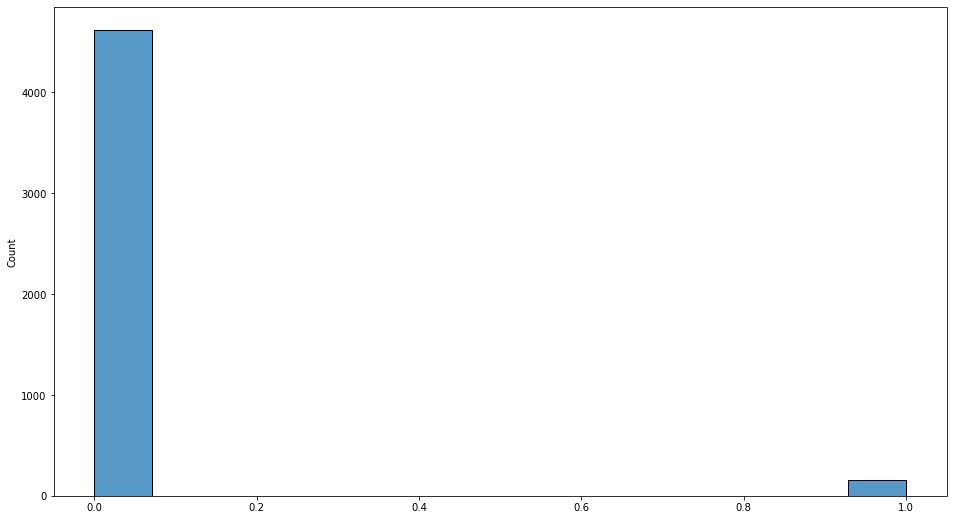

In [141]:
plt.figure(figsize=(16,9))
sns.histplot(y_train)

# Checking the importance of each feature

In [142]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target
mi = mutual_info_classif(X_train, y_train)
mi

array([0.03403649, 0.03249904, 0.03008405, 0.01337519, 0.01377024,
       0.01793951, 0.0283044 , 0.02704932, 0.02324214, 0.03530617,
       0.00310152, 0.        , 0.01263479, 0.        , 0.02200805,
       0.02982444, 0.02944188, 0.02774673, 0.0415544 , 0.00781205,
       0.00217543, 0.02180005, 0.03332138, 0.00505163, 0.00488786,
       0.01173696, 0.01068605, 0.0164092 , 0.00873755, 0.02800694,
       0.0112057 , 0.00121894, 0.0230174 , 0.02182548, 0.03457795,
       0.03185546, 0.03625641, 0.036047  , 0.00908069, 0.03627953,
       0.00322157, 0.02005593, 0.03679744, 0.00125277, 0.00680686,
       0.        , 0.00060817, 0.00208617, 0.00231447, 0.00381054,
       0.00073046, 0.01681309, 0.00297704, 0.02180869, 0.00414814,
       0.        , 0.01384269, 0.01722397, 0.00589217, 0.01681246,
       0.01391912, 0.02060055, 0.        , 0.00201814, 0.01561926,
       0.02240967, 0.00351749, 0.03278807, 0.02696831, 0.00890914,
       0.        , 0.00252536, 0.01624969, 0.00423287, 0.00436

# Visualization of  importance of each feature

Below we can see importance of each feature. Then we will choose the best 10 to use them to our models


Text(0, 0.5, 'Mutual Information')

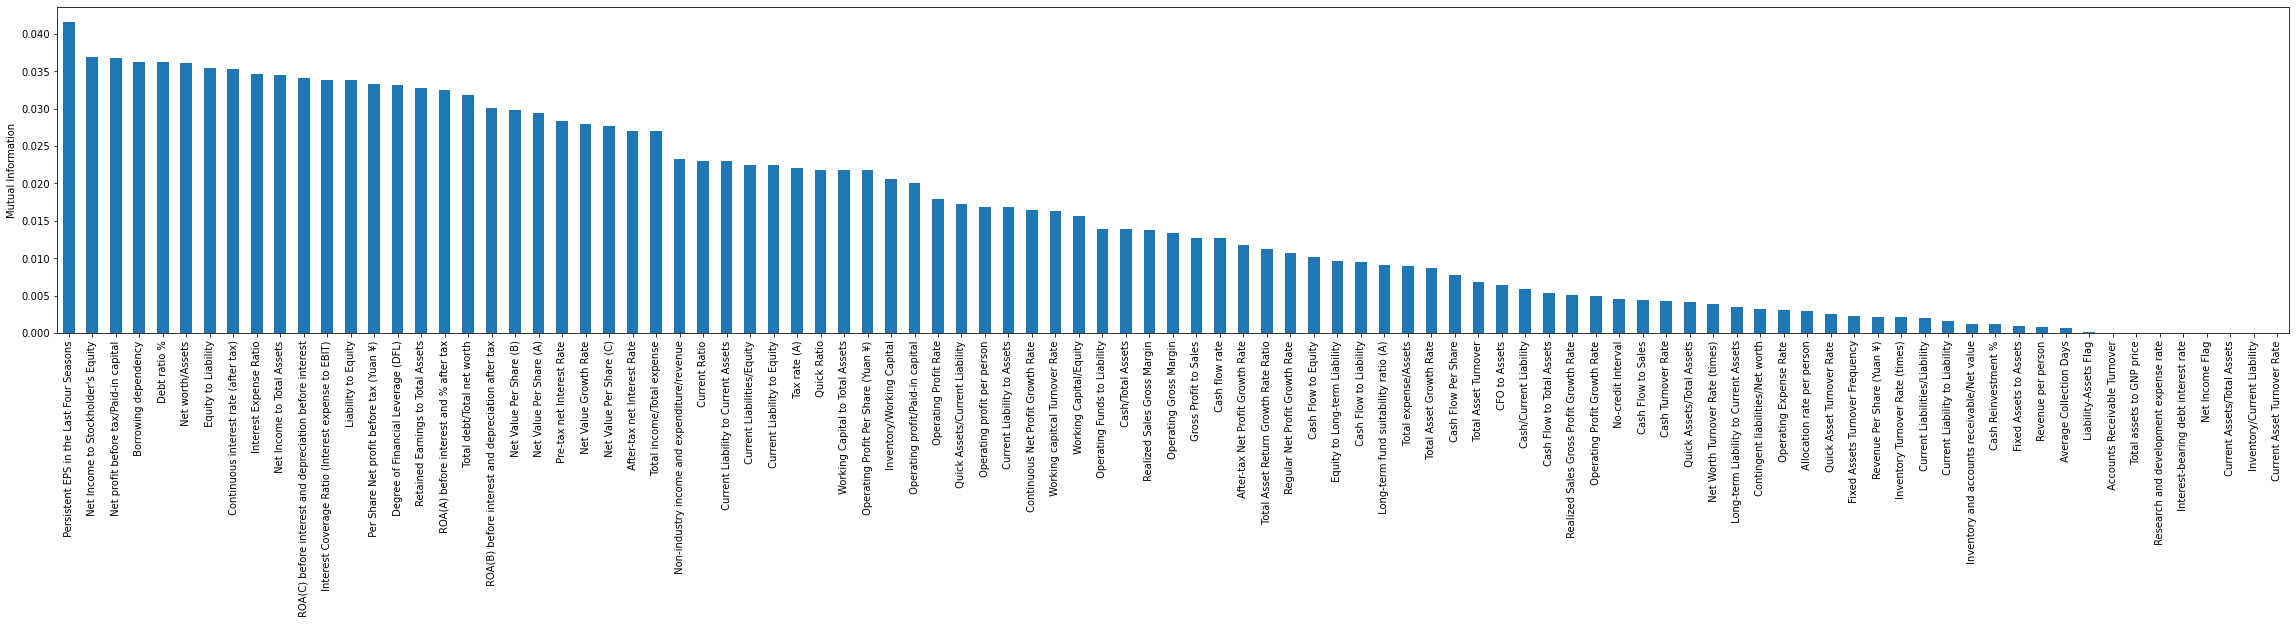

In [143]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(40, 6))
plt.ylabel('Mutual Information')

In [144]:
# here we will select the top 10 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]
cols = X_train.columns[sel_.get_support(indices=True)]
cols

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

Above we can see choosen feautures which impact the most on our feature `Bankrupt?`

In [145]:
X_train = X_train.loc[:,cols]
X_val = X_val.loc[:,cols]
X_test = X_test.loc[:,cols]

In [146]:
X_train

,Continuous interest rate (after tax),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Total debt/Total net worth,Debt ratio %,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Net Income to Stockholder's Equity,Equity to Liability
3295,0.781681,0.220667,0.175115,0.005449,0.110409,0.889591,0.374864,0.174135,0.841063,0.034138
2232,0.781630,0.220289,0.172253,0.016989,0.192853,0.807147,0.385040,0.171292,0.840652,0.018026
5538,0.781743,0.228893,0.180688,0.003995,0.089821,0.910179,0.373600,0.179519,0.840884,0.042552
6282,0.781576,0.215751,0.171650,0.003699,0.085074,0.914926,0.371468,0.170719,0.840060,0.045048
2143,0.781641,0.217737,0.175190,0.000789,0.023400,0.976600,0.369637,0.173539,0.840950,0.154753
...,...,...,...,...,...,...,...,...,...,...
4688,0.781665,0.239576,0.191459,0.009423,0.150316,0.849684,0.375922,0.189759,0.841515,0.024197
1078,0.781612,0.217548,0.168261,0.010300,0.156937,0.843063,0.381245,0.167363,0.839643,0.023023
6687,0.783383,0.316347,0.254651,0.000865,0.025456,0.974544,0.369637,0.250486,0.844092,0.143685
2623,0.781686,0.248464,0.205995,0.003061,0.074070,0.925930,0.369637,0.205037,0.843796,0.051988


In [147]:
print('X_train:', X_train.shape)
print('y_train:', X_train.shape)
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('y_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4773, 10)
y_train: (4773, 10)
X_val: (1432, 10)
y_val: (1432,)
y_test: (614, 10)
y_test: (614,)


# Feature scaling

In [222]:
sc = MinMaxScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train.values), index = X_train.index, columns = X_train.columns)
X_val = pd.DataFrame(sc.fit_transform(X_val.values), index = X_val.index, columns = X_val.columns)
X_test = pd.DataFrame(sc.fit_transform(X_test.values), index = X_test.index, columns = X_test.columns)

In [223]:
X_train

,Continuous interest rate (after tax),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Total debt/Total net worth,Debt ratio %,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Net Income to Stockholder's Equity,Equity to Liability
3295,0.781681,0.154217,0.167528,9.188380e-13,0.110409,0.889591,0.268081,0.128430,0.757478,0.034138
2232,0.781630,0.153807,0.164640,2.864929e-12,0.192853,0.807147,0.282612,0.125430,0.756850,0.018026
5538,0.781743,0.163144,0.173153,6.737120e-13,0.089821,0.910179,0.266275,0.134112,0.757203,0.042552
6282,0.781576,0.148882,0.164032,6.237334e-13,0.085074,0.914926,0.263232,0.124825,0.755946,0.045048
2143,0.781641,0.151036,0.167604,1.330201e-13,0.023400,0.976600,0.260617,0.127801,0.757304,0.154753
...,...,...,...,...,...,...,...,...,...,...
4688,0.781665,0.174738,0.184022,1.589013e-12,0.150316,0.849684,0.269592,0.144919,0.758167,0.024197
1078,0.781612,0.150831,0.160611,1.736950e-12,0.156937,0.843063,0.277192,0.121284,0.755309,0.023023
6687,0.783383,0.258055,0.247796,1.459376e-13,0.025456,0.974544,0.260617,0.209007,0.762099,0.143685
2623,0.781686,0.184383,0.198693,5.162408e-13,0.074070,0.925930,0.260617,0.161043,0.761648,0.051988


In [167]:
X_train.columns

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

# Distributions of choosen features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F3FB43F70>,
      dtype=object)

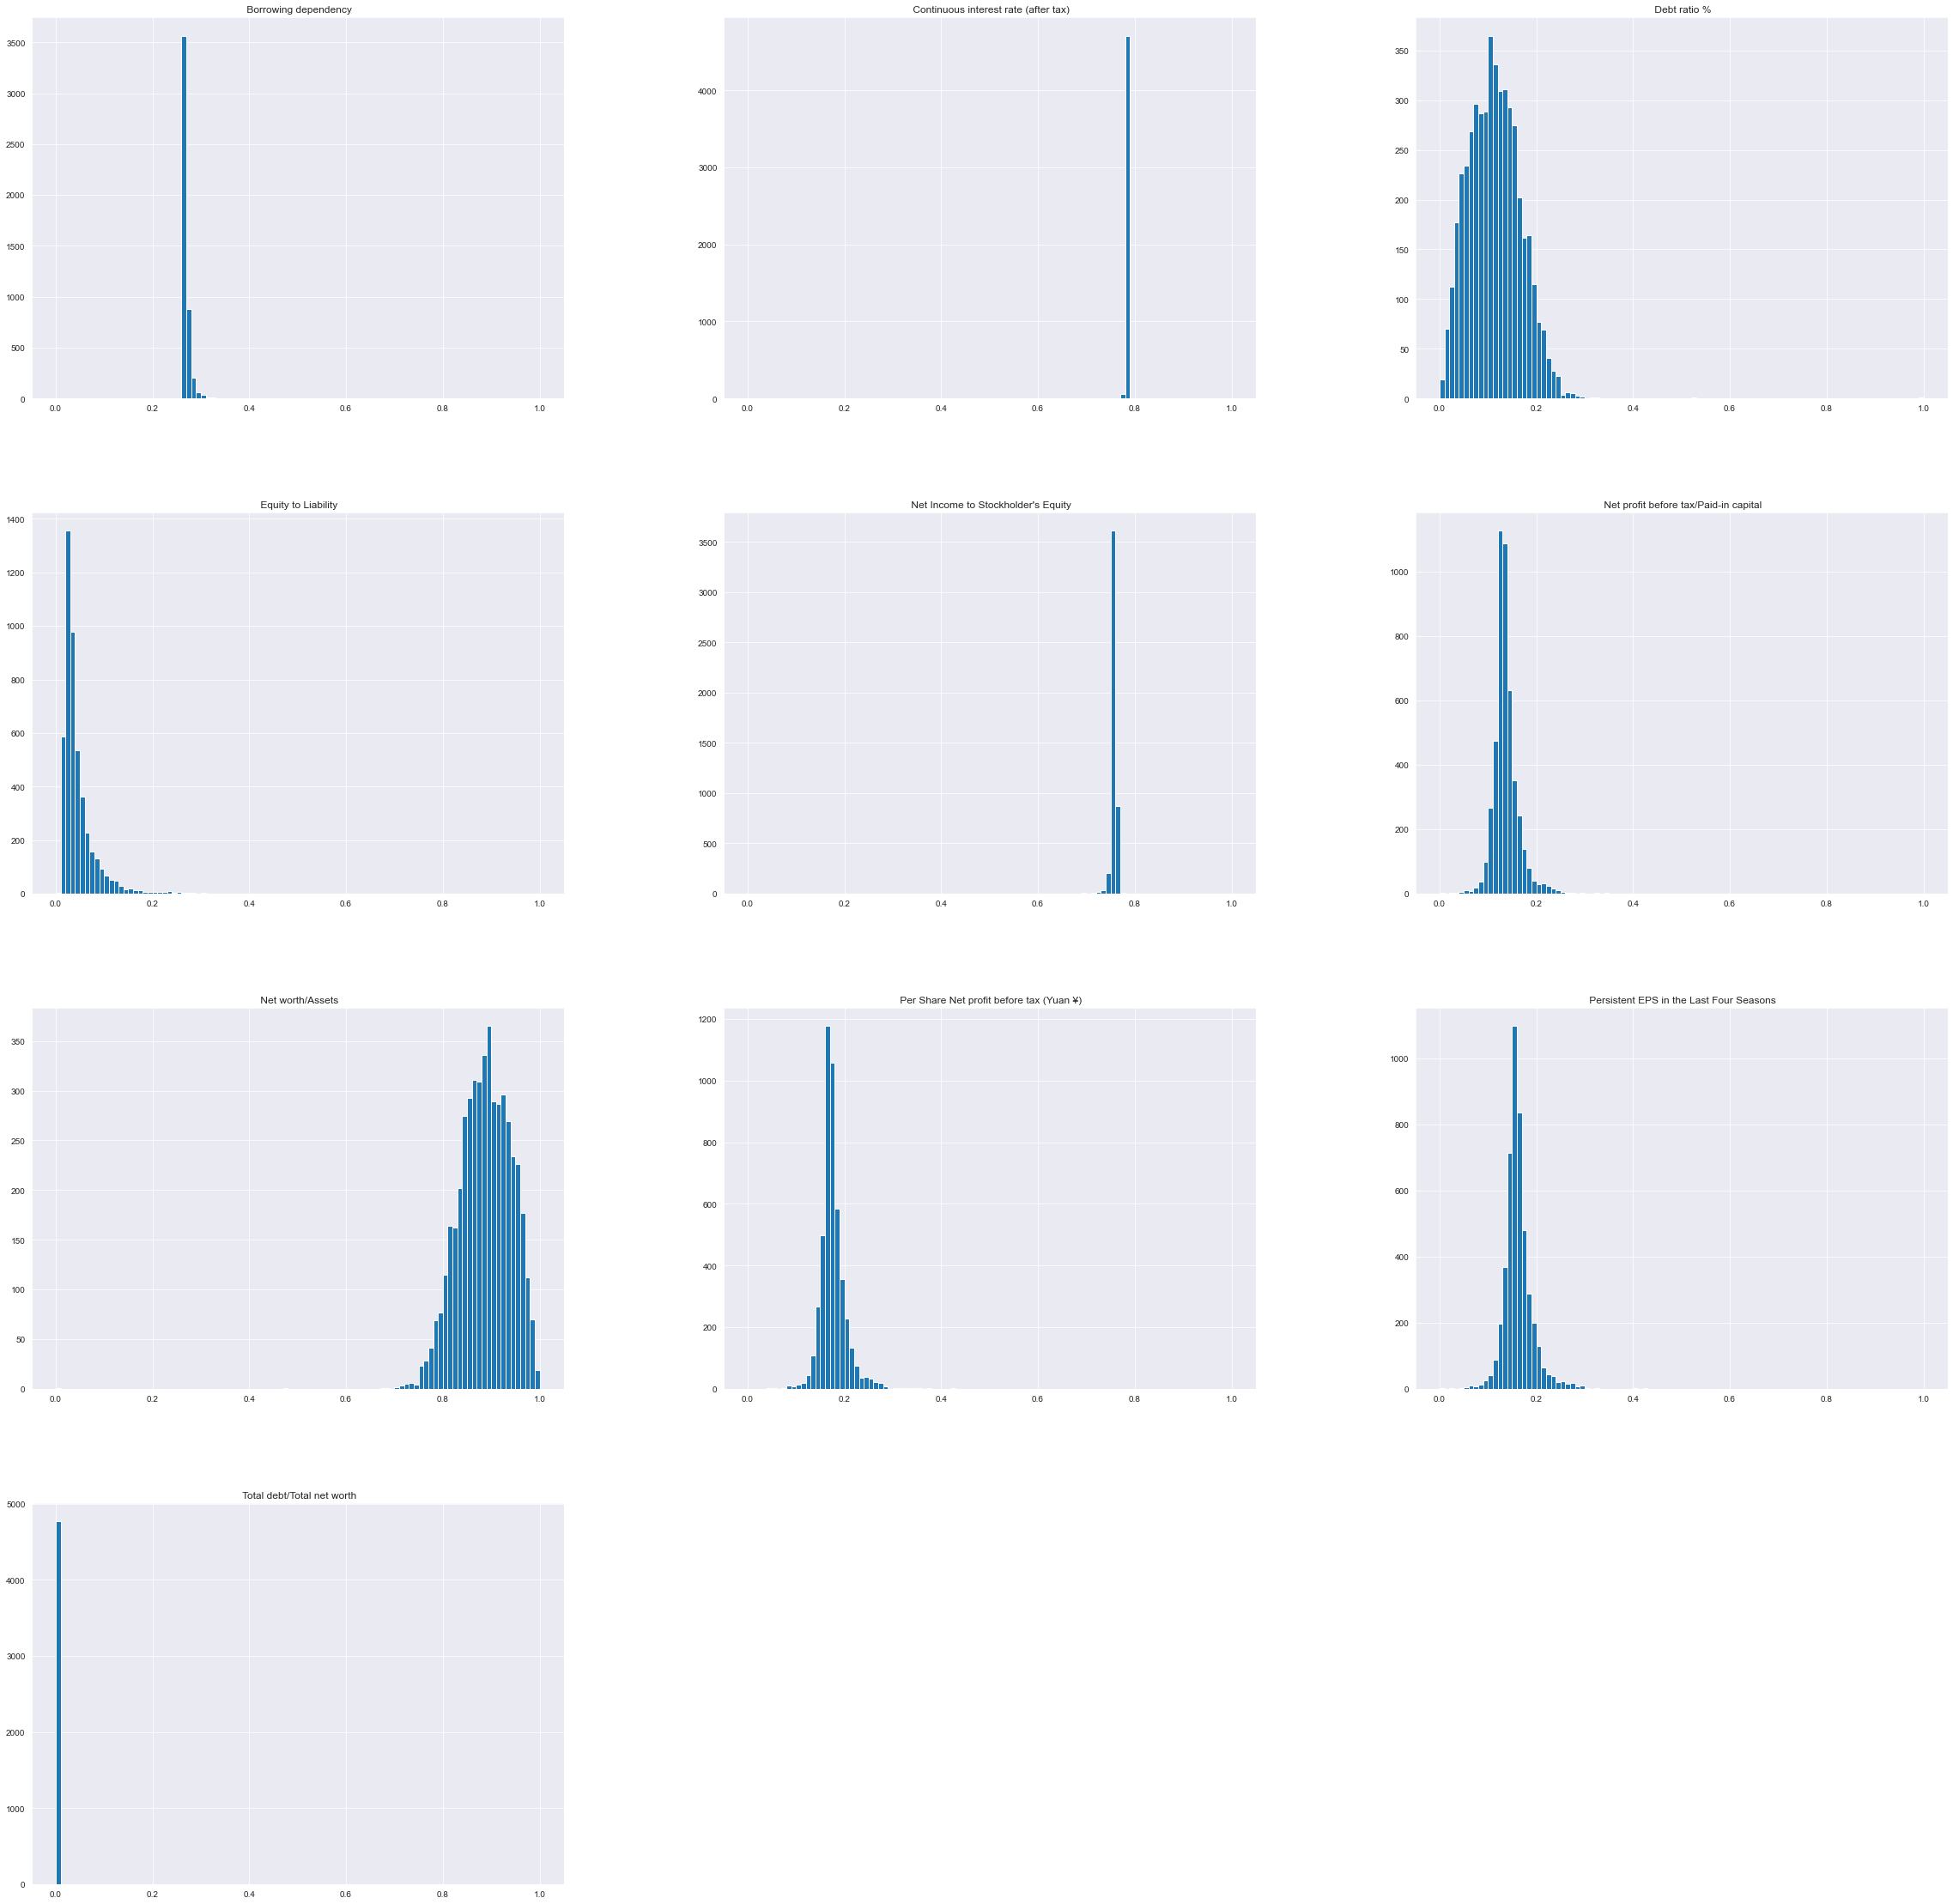

In [230]:
X_train.hist(figsize=(40, 40), bins = 100)

# Feature log transformation

Changing skew features to make them likely `normal` distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F452E52E0>,
      dtype=object)

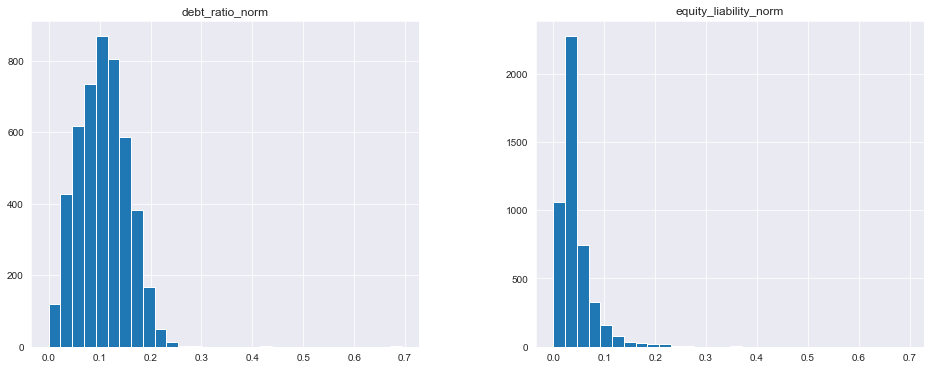

In [228]:
X_train_transformed = X_train
X_train_transformed = X_train_transformed.assign(debt_ratio_norm = np.log1p(X_train[' Debt ratio %']))
X_train_transformed = X_train_transformed.assign(equity_liability_norm = np.log1p(X_train[' Equity to Liability']))
X_train_transformed[['debt_ratio_norm', 'equity_liability_norm']].hist(bins=30, figsize=(16, 6))

# Building logistic regression model

In [203]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Checking metrics


In [204]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc_logistic_reg = accuracy_score(y_test,y_pred)
print(f"Accuracy score: ", accuracy_score(y_test,y_pred))
print("precision: ", precision_score(y_test,y_pred))
print("recall: ", recall_score(y_test,y_pred))
print("f1: ", f1_score(y_test,y_pred))

Accuracy score:  0.9690553745928339
precision:  0.5714285714285714
recall:  0.2
f1:  0.29629629629629634


# Building SVM model

In [205]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Checking metrics and confusion matrix

<function matplotlib.pyplot.show(*args, **kw)>

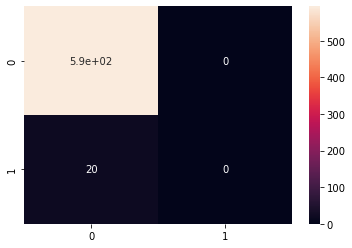

In [206]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show

In [207]:
acc_SVM = accuracy_score(y_test,y_pred)
print(f"Accuracy score: ", accuracy_score(y_test,y_pred))
print("precision: ", precision_score(y_test,y_pred))
print("recall: ", recall_score(y_test,y_pred))
print("f1: ", f1_score(y_test,y_pred))

Accuracy score:  0.9674267100977199
precision:  0.0
recall:  0.0
f1:  0.0


C:\Users\sguci\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Building random forest model

In [208]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

<function matplotlib.pyplot.show(*args, **kw)>

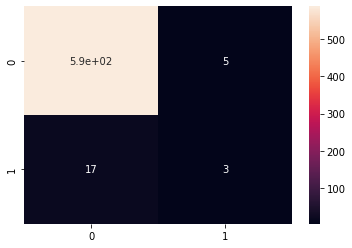

In [209]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show

In [210]:
acc_random_forest = accuracy_score(y_test,y_pred)
print(f"Accuracy score: ", accuracy_score(y_test,y_pred))
print("precision: ", precision_score(y_test,y_pred))
print("recall: ", recall_score(y_test,y_pred))
print("f1: ", f1_score(y_test,y_pred))

Accuracy score:  0.9641693811074918
precision:  0.375
recall:  0.15
f1:  0.21428571428571425


We can notice that precision, recall and f1 is not as good as we want but it is caused because of lack of data with `Bankrupt?` feature  = 1. There are definitely more data only with `Bankrupt?` feature = 0

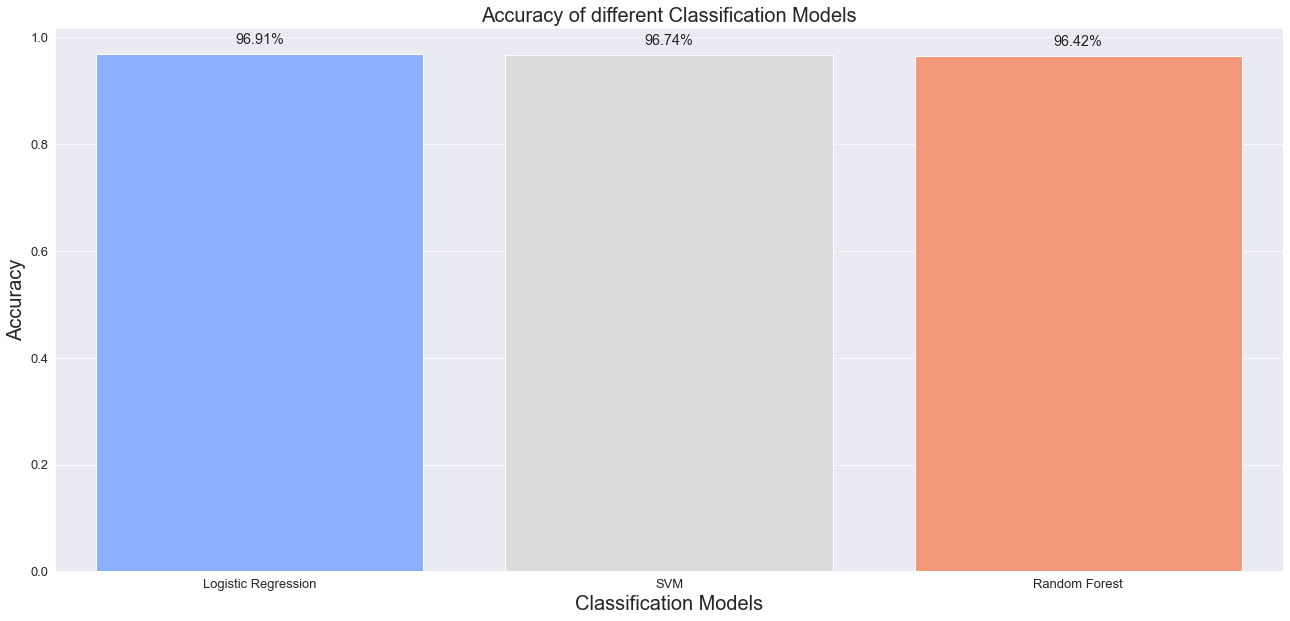

In [213]:
accuracy=[]
models=[]
accuracy.append(acc_logistic_reg)
models.append("Logistic Regression")
accuracy.append(acc_SVM)
models.append("SVM")
accuracy.append(acc_random_forest)
models.append("Random Forest")

plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=accuracy, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center')
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()